# 01-LIDAR Tracing 2d

This workflow returns an accurate 2d outline representation of a building captured by LIDAR.

Main tracing is done with the [Hough Transform algorithm.](https://en.wikipedia.org/wiki/Hough_transform)

The hough algorithm uses a [concave hull](https://towardsdatascience.com/the-concave-hull-c649795c0f0f) based on João Paulo Figueira's work. It works but it is EXTREMELY slow. Version 02 of this research replaces this algorithm with a much quicker solution.

This notebook also begins looking at inner loops in roof geometries.

In [7]:
# DEPENDENCIES
from matplotlib import pyplot as plt
from code.file_helpers import point_list
from code.concavehull import ConcaveHull
from code.inner_rings import InnerRings

pt_cloud = 'data/jagged_pt_cloud.txt'

In [8]:
bldg_points, bldg_elevation, bldg_translation = point_list(pt_cloud)
bldg_hull = ConcaveHull(bldg_points)
bldg_outline = bldg_hull.calculate(0) #need to figure out a way to pre-optimize this value of neighbour index

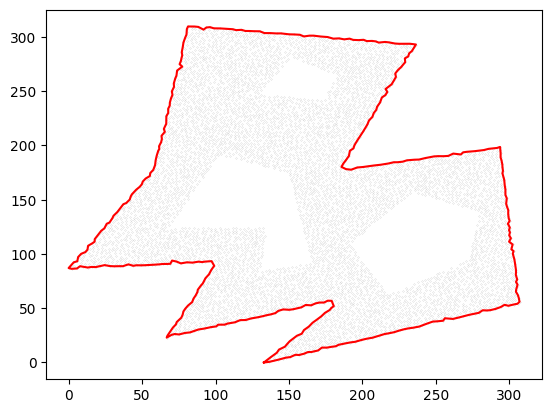

In [9]:
#plotting the cloud
cloud_x_vals = [pt[0] for pt in bldg_points]
cloud_y_vals = [pt[1] for pt in bldg_points]

#plotting the outline
outline_x_vals = [pt[0] for pt in bldg_outline]
outline_y_vals = [pt[1] for pt in bldg_outline]

plt.plot(outline_x_vals, outline_y_vals, c = 'red')
plt.scatter(cloud_x_vals, cloud_y_vals, s = 0.01, c ='grey')


In [ ]:

jagged_path = pt_cloud
jagged_pts, jagged_elevation, jagged_translation = point_list(jagged_path)

testR = InnerRings(jagged_pts)
output_pts = testR.calculate()

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(14,14))
for yo in jagged_pts:
    plt.scatter(yo[0],yo[1], s=1, c=0.8)
for pt in output_pts:
    plt.scatter(pt[0], pt[1])